# Churn Prediction System

Dataset Source: https://www.kaggle.com/datasets/sanamps/churn-modelling-with-ann

In [1]:
#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Knowing the Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Missing Values Treatement

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

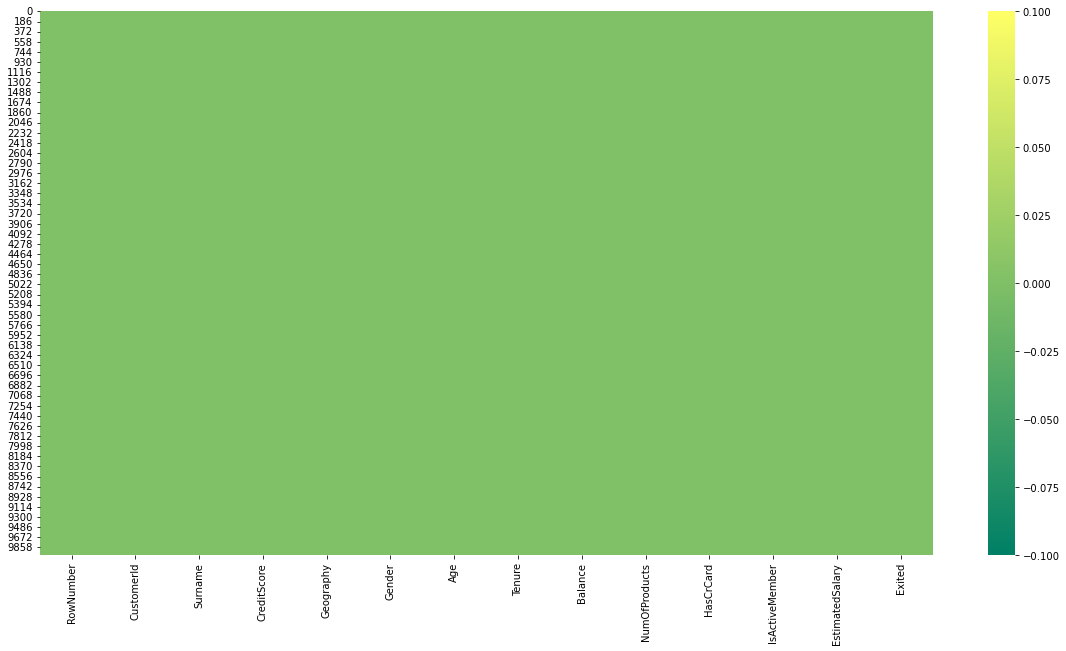

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap='summer')

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [12]:
df.duplicated().sum()

0

# EDA

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
n_col=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']

In [15]:
sns.set_style('whitegrid')

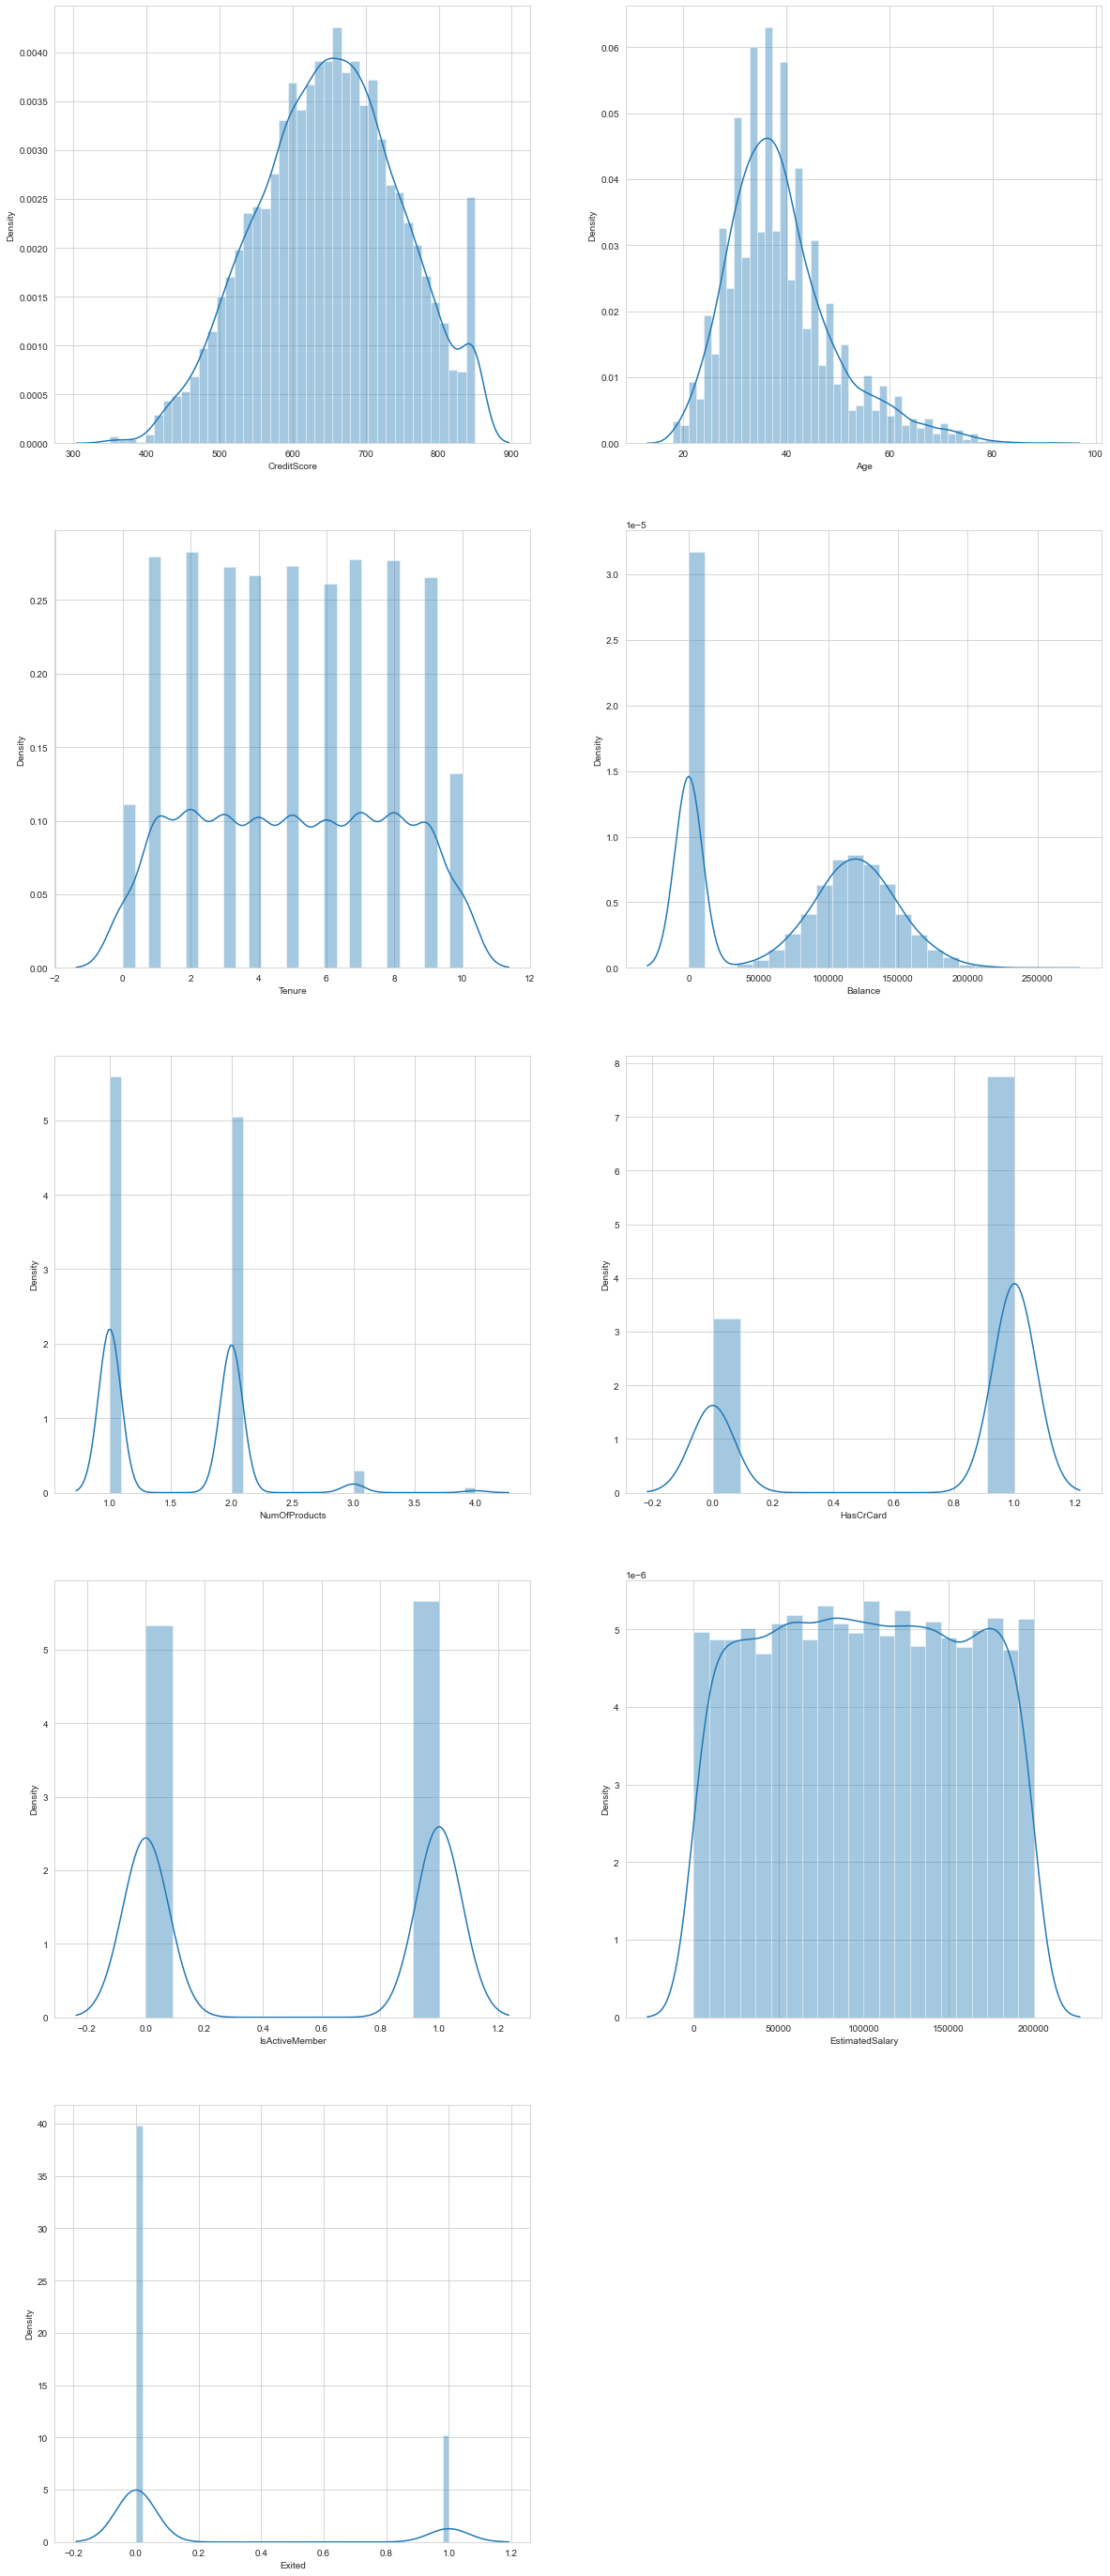

In [16]:
plt.figure(figsize=(20,60))
for i,j in enumerate(n_col):
    plt.subplot(6,2,i+1)
    sns.distplot(df[j])

<AxesSubplot:xlabel='Gender', ylabel='count'>

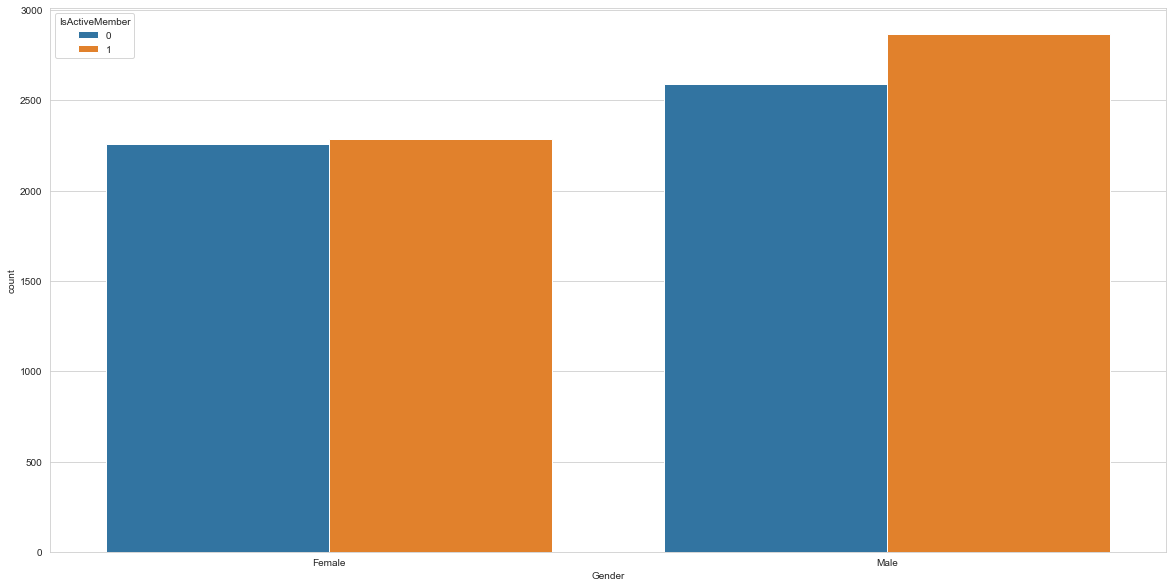

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='Gender',data=df,hue='IsActiveMember')

<AxesSubplot:xlabel='Gender', ylabel='count'>

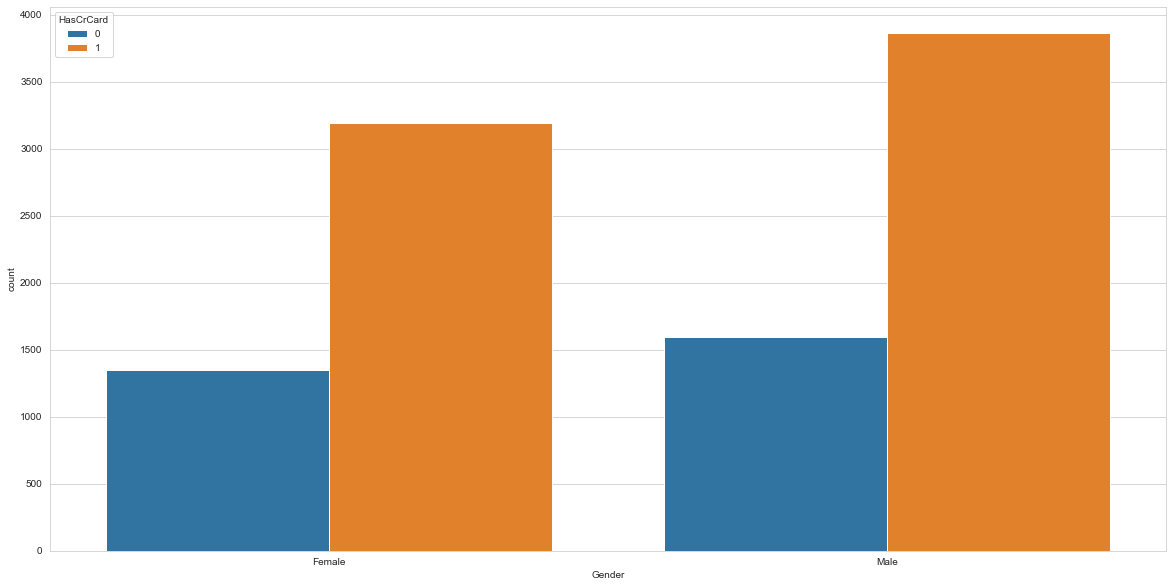

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='Gender',data=df,hue='HasCrCard')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

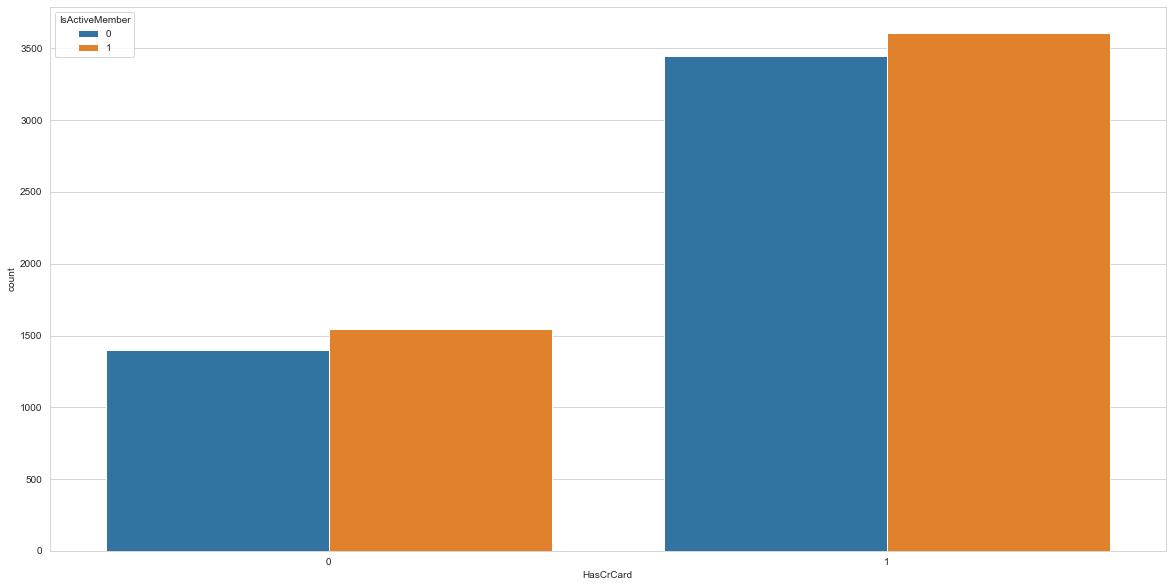

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='HasCrCard',data=df,hue='IsActiveMember')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

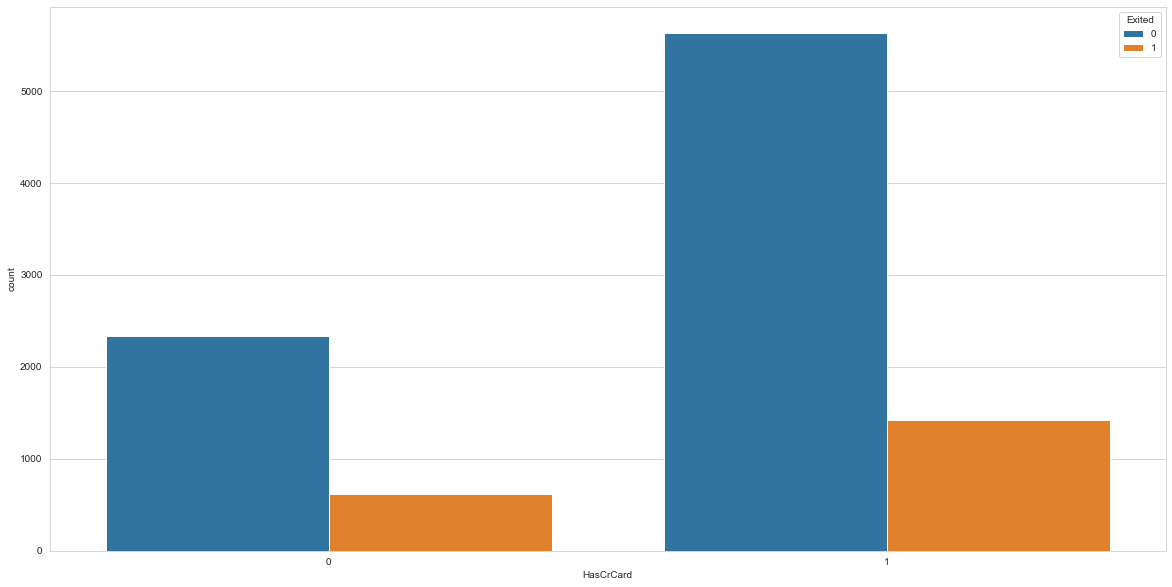

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='HasCrCard',data=df,hue='Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

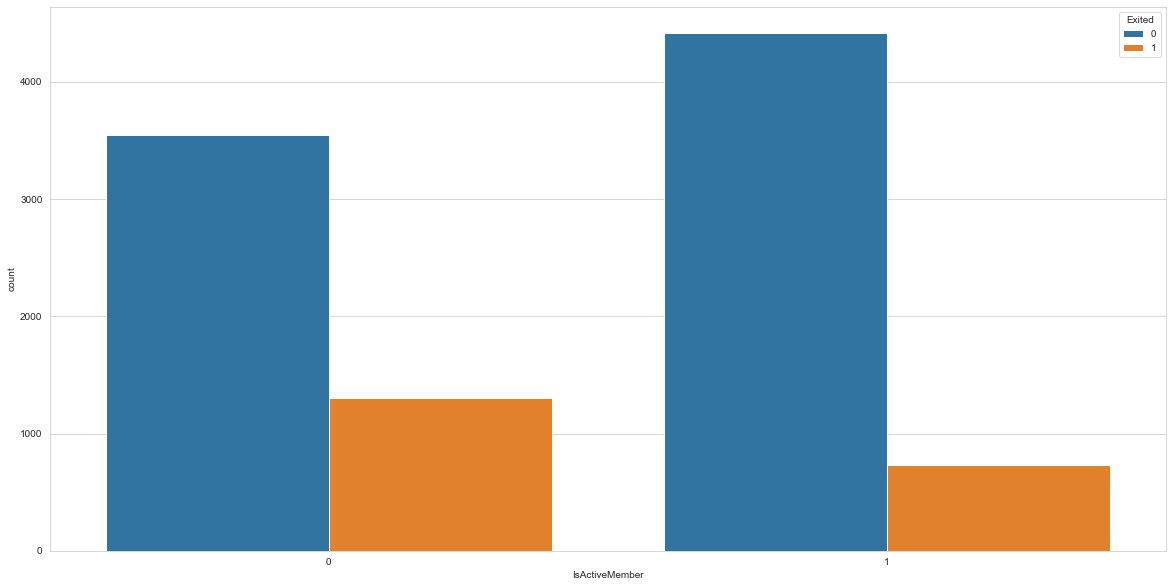

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='IsActiveMember',data=df,hue='Exited')

<AxesSubplot:>

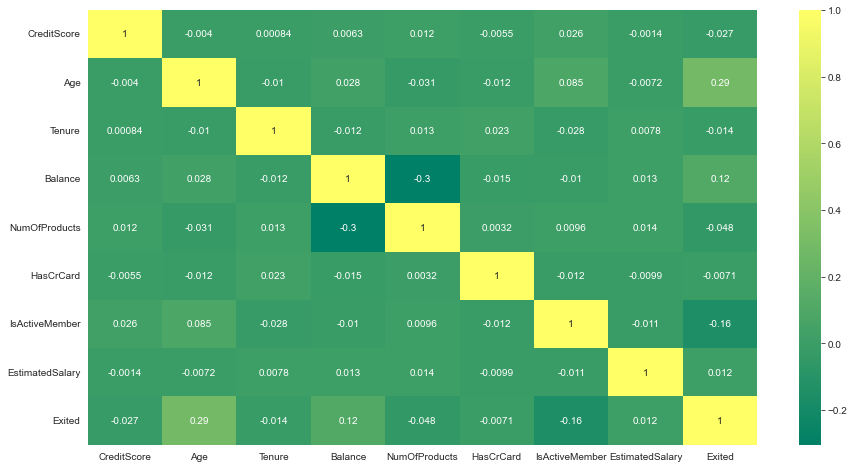

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='summer')

# Converting Catogorical col to Numeric Col

In [23]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
o_col=['Geography','Gender']

In [25]:
for i in o_col:
    print(i,df[i].nunique(),'\n',df[i].value_counts())

Geography 3 
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender 2 
 Male      5457
Female    4543
Name: Gender, dtype: int64


In [26]:
df=pd.get_dummies(df,drop_first=True)

In [27]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [28]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

# Spliting data into X and Y

In [29]:
X=df.drop('Exited',axis=1)
Y=df['Exited']

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [31]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state = 101)

In [33]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7000, 11)
(7000,)
(3000, 11)
(3000,)


# Feature Scalling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
print(X_train)

[[0.322      0.14864865 0.9        ... 0.         1.         0.        ]
 [0.75       0.64864865 0.4        ... 0.         0.         1.        ]
 [0.518      0.58108108 0.1        ... 0.         1.         1.        ]
 ...
 [0.732      0.31081081 0.8        ... 1.         0.         1.        ]
 [0.456      0.18918919 0.4        ... 0.         0.         1.        ]
 [0.606      0.16216216 0.2        ... 0.         1.         0.        ]]


In [1]:
#!pip install tensorflow
#!pip install keras

# Create Artificial Neural Networks

In [44]:
import keras
from keras.models import Sequential
# 'Sequential' is used to create an Artificial Neural Network
from keras.layers import Dense  

In [46]:
# Initializing the ANN
ann_clf = Sequential()

In [47]:
# Adding the input layer and first hidden layer
ann_clf.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

In [48]:
# Adding Second Hidden layer 
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [50]:
# Adding the output layer 
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

# Compiling the ANN

In [52]:
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
# Gradient Descent
# stochastic Gradient Descent
# Mini batch GD
# Rms promp
# adam
# adadelta
# adagrad

# Model Summary

In [54]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Model Training 

In [56]:
ann_clf.fit(X_train,Y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
147/147 [==============================] - 1s 4ms/step - loss: 0.4073 - accuracy: 0.8326 - val_loss: 0.4013 - val_accuracy: 0.8369
Epoch 2/100
147/147 [==============================] - 1s 8ms/step - loss: 0.4076 - accuracy: 0.8339 - val_loss: 0.4038 - val_accuracy: 0.8312
Epoch 3/100
147/147 [==============================] - 1s 8ms/step - loss: 0.4082 - accuracy: 0.8341 - val_loss: 0.4015 - val_accuracy: 0.8369
Epoch 4/100
147/147 [==============================] - 1s 8ms/step - loss: 0.4081 - accuracy: 0.8328 - val_loss: 0.4022 - val_accuracy: 0.8360
Epoch 5/100
147/147 [==============================] - 1s 8ms/step - loss: 0.4074 - accuracy: 0.8345 - val_loss: 0.4016 - val_accuracy: 0.8369
Epoch 6/100
147/147 [==============================] - 1s 7ms/step - loss: 0.4072 - accuracy: 0.8339 - val_loss: 0.4019 - val_accuracy: 0.8364
Epoch 7/100
147/147 [==============================] - 1s 9ms/step - loss: 0.4076 - accuracy: 0.8354 - val_loss: 0.4011 - val_accuracy: 0.8369

# Predicting the Test result

In [57]:
Y_pred = ann_clf.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [58]:
Y_pred

array([[0.166058  ],
       [0.02713101],
       [0.3379353 ],
       ...,
       [0.05111381],
       [0.6311505 ],
       [0.5071846 ]], dtype=float32)

In [59]:
Y_pred = (Y_pred>0.5)

In [69]:
from sklearn.metrics import accuracy_score,  confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [70]:
print(accuracy

0.839

In [73]:
cm

array([[2300,   78],
       [ 405,  217]], dtype=int64)